In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
train = pd.read_csv('TitanicTrain.csv')
test = pd.read_csv('Titanictest.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.shape

(891, 12)

# Data Visualization

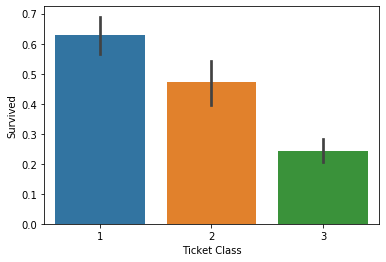

In [6]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.xlabel('Ticket Class')
plt.ylabel('Survived')
plt.show()

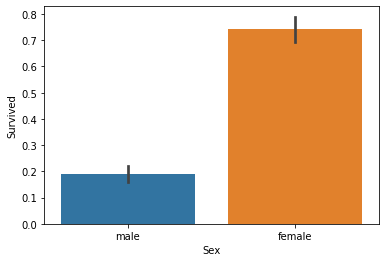

In [7]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

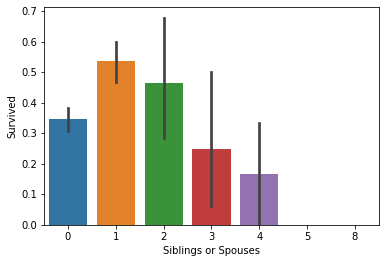

In [8]:
sns.barplot(x='SibSp', y='Survived', data=train)
plt.xlabel('Siblings or Spouses')
plt.ylabel('Survived')
plt.show()

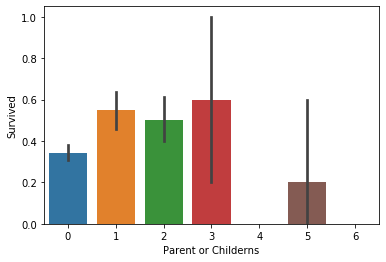

In [9]:
sns.barplot(x='Parch', y='Survived', data=train)
plt.xlabel('Parent or Childerns')
plt.ylabel('Survived')
plt.show()

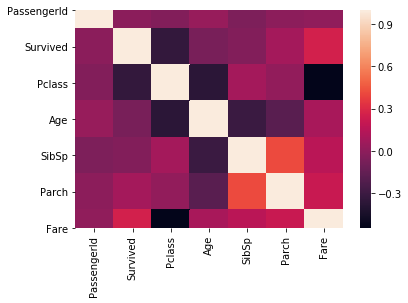

In [10]:
corr = train.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Data Cleaning

In [11]:
def checkNull(df):
    total = df.isnull().sum()
    percent = (total / df.isnull().count()) * 100
    null_df = pd.concat([total, percent], keys=['Sum', 'Percent'], axis=1)
    return null_df

In [12]:
checkNull(train)

,Sum,Percent
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [13]:
checkNull(test)

,Sum,Percent
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [14]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train['Cabin'].fillna(train['Cabin'].mode()[0], inplace=True)
train['Age'].fillna(0, inplace=True)
train['Title'] = train['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [15]:
test['Age'].fillna(0, inplace=True)
test['Cabin'].fillna(test['Cabin'].mode()[0], inplace=True)
test.dropna(inplace=True)
test['Title'] = train['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme'],
      dtype=object)

In [16]:
checkNull(train)

,Sum,Percent
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


In [17]:
checkNull(test)

,Sum,Percent
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0
Cabin,0,0.0


In [18]:
def changeTitle(df):
    df['Title'] = df['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna(0)
    df['Title'] = df['Title'].astype('int64')

In [19]:
changeTitle(train)
changeTitle(test)

In [20]:
sex_mapping = {'male':1, 'female':2}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [21]:
age_bins = [-1, 0, 3, 14, 18, 30, 80]
age_labels = ['Unknown', 'Infant', 'Childern', 'Teenagers', 'Adult', 'Old']
train['AgeGroup'] = pd.cut(train['Age'], age_bins, labels=age_labels)
test['AgeGroup'] = pd.cut(test['Age'], age_bins, labels=age_labels)

In [22]:
age_mapping = {'Unknown': 0, 'Infant': 1, 'Childern': 2, 'Teenagers': 3, 'Adult': 4, 'Old': 5}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

In [23]:
emb_mapping = {'S': 0, 'C': 1, 'Q': 2}
train['Embarked'] = train['Embarked'].map(emb_mapping)
test['Embarked'] = test['Embarked'].map(emb_mapping)

In [24]:
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])

In [25]:
train.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,1,0,3,1,1,0,0,1,4,1
1,2,1,1,2,1,0,1,3,5,4
2,3,1,3,2,0,0,0,2,4,2
3,4,1,1,2,1,0,0,3,5,4
4,5,0,3,1,0,0,0,1,5,2


In [27]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,892,3,1,0,0,2,1,5,1
1,893,3,2,1,0,0,3,5,4
2,894,2,1,0,0,2,2,5,2
3,895,3,1,0,0,0,3,4,4
4,896,3,2,1,1,0,1,4,2


# Prediction & Evaluation

In [28]:
x = train.drop('Survived', axis=1)
y = train['Survived']

**1. KNN**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

ks = list(range(1,51))
k = 0
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = ks, weights = weight_options)

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(x_train,y_train)

knn = KNeighborsClassifier(grid.best_params_['n_neighbors'])

C:\Users\Vargier\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
knn.fit(x_train,y_train)
yhat = knn.predict(x_test)
kscore = knn.score(x_test, y_test)
kscore

0.5921787709497207

**2. Gaussian Distribution**

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train,y_train)
yhat = gaussian.predict(x_test)
gscore = gaussian.score(x_test,y_test)
gscore

0.7821229050279329

**3. Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
yhat = lr.predict(x_test)
lscore = lr.score(x_test, y_test)
lscore

C:\Users\Vargier\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8100558659217877

**4. Random Forest Classifier**

In [33]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(x_train,y_train)
yhat = forest.predict(x_test)
fscore = forest.score(x_test, y_test)
fscore

C:\Users\Vargier\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8268156424581006

In [34]:
models = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Distribution', 'Logistic Regression', 'Random Forest'],
    'Score': [kscore, gscore, lscore, fscore]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.826816
2,Logistic Regression,0.810056
1,Gaussian Distribution,0.782123
0,KNN,0.592179


In [35]:
yhat = forest.predict(test)


In [36]:
submission = pd.DataFrame({ 'PassengerId' : test['PassengerId'], 'Survived': yhat })
submission.to_csv('submission.csv', index=False)